In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-06-03 00:22:14.421368: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [6]:
print(tf.__version__)

2.5.0


# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

In [26]:
DatasetName = 'Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = 'Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [22]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [27]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 47006 files belonging to 2 classes.


In [28]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 13803 files belonging to 2 classes.


# Training

In [29]:
# Hyperparamers to be used in all models
base_learning_rate = 0.0005
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 40

# Custom CNN model

In [30]:
def get_densenet():
    return tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)

In [13]:
def get_model_A(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    processed_input =  tf.keras.applications.densenet.preprocess_input(inputs)
    
    if data_aug:
        processed_input = data_augmentation(processed_input)
    
    conv = keras.layers.Conv2D(filters=16, activation='relu', kernel_size=3)(processed_input)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)
    
    gal = keras.layers.Flatten()(pool)
    
    x = keras.layers.Dense(512)(gal)
    
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

In [14]:
def get_model_A_2(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    processed_input =  tf.keras.applications.densenet.preprocess_input(inputs)
    
    if data_aug:
        processed_input = data_augmentation(processed_input)
    
    conv = keras.layers.Conv2D(filters=16, activation='relu', kernel_size=3)(processed_input)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)
    
    gal = keras.layers.Flatten()(pool)
    
    x = keras.layers.Dense(512, activation='relu')(gal)
    
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs, x)

In [15]:
def get_model_B(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    processed_input =  tf.keras.applications.densenet.preprocess_input(inputs)
    
    if data_aug:
        processed_input = data_augmentation(processed_input)

    conv = keras.layers.Conv2D(filters=16, activation='relu', kernel_size=3)(processed_input)
    pool = keras.layers.AveragePooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.AveragePooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.AveragePooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.AveragePooling2D(2,2)(conv)
    
    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.AveragePooling2D(2,2)(conv)
    
    gal = keras.layers.Flatten()(pool)
    
    x = keras.layers.Dense(512)(gal)
    
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

In [16]:
def get_model_C(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    processed_input =  tf.keras.applications.densenet.preprocess_input(inputs)
    
    if data_aug:
        processed_input = data_augmentation(processed_input)
    
    conv = keras.layers.Conv2D(filters=16, activation='relu', kernel_size=3)(processed_input)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)

    conv = keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3)(pool)
    pool = keras.layers.MaxPooling2D(2,2)(conv)
    
    gal = keras.layers.Flatten()(pool)
    
    x = keras.layers.Dense(256)(gal)
    
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

In [17]:
model = get_model_A()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        4640  

In [18]:
data_augmentation = tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Training models

In [19]:
def train_model(model, epochs):
    print("Training model, epochs: ", epochs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=validation_dataset)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    training_loss = history.history['loss']
    val_loss = history.history['val_loss']

    loss, accuracy = model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    return acc, val_acc, training_loss, val_loss

In [20]:
def show_plot(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

Training model, epochs:  40
Epoch 1/40


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(
2022-06-03 00:41:04.629097: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-03 00:41:04.653050: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099885000 Hz


1469/1469 [==============================] - 191s 129ms/step - loss: 0.3394 - accuracy: 0.8501 - val_loss: 0.2630 - val_accuracy: 0.8832
Epoch 2/40
1469/1469 [==============================] - 176s 120ms/step - loss: 0.2527 - accuracy: 0.8957 - val_loss: 0.2161 - val_accuracy: 0.9111
Epoch 3/40
1469/1469 [==============================] - 174s 119ms/step - loss: 0.2182 - accuracy: 0.9119 - val_loss: 0.1980 - val_accuracy: 0.9207
Epoch 4/40
1469/1469 [==============================] - 174s 118ms/step - loss: 0.2017 - accuracy: 0.9218 - val_loss: 0.1856 - val_accuracy: 0.9234
Epoch 5/40
1469/1469 [==============================] - 173s 118ms/step - loss: 0.1912 - accuracy: 0.9255 - val_loss: 0.1725 - val_accuracy: 0.9336
Epoch 6/40
1469/1469 [==============================] - 173s 117ms/step - loss: 0.1819 - accuracy: 0.9304 - val_loss: 0.1635 - val_accuracy: 0.9386
Epoch 7/40
1469/1469 [==============================] - 173s 118ms/step - loss: 0.1778 - accuracy: 0.9328 - val_loss: 0.155

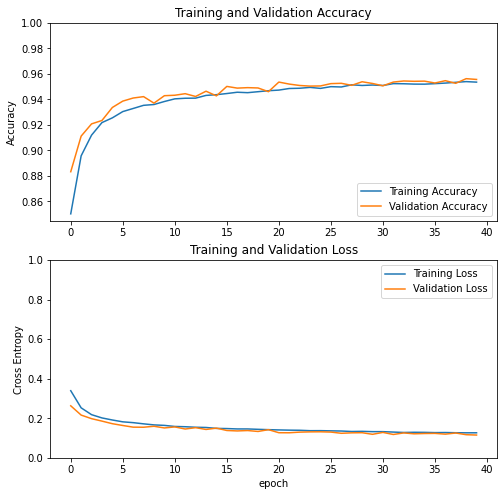

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 182s 123ms/step - loss: 0.3382 - accuracy: 0.8525 - val_loss: 0.2605 - val_accuracy: 0.8876
Epoch 2/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.2462 - accuracy: 0.8993 - val_loss: 0.2153 - val_accuracy: 0.9132
Epoch 3/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.2158 - accuracy: 0.9127 - val_loss: 0.2043 - val_accuracy: 0.9189
Epoch 4/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.1987 - accuracy: 0.9228 - val_loss: 0.1786 - val_accuracy: 0.9307
Epoch 5/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.1885 - accuracy: 0.9273 - val_loss: 0.1731 - val_accuracy: 0.9341
Epoch 6/40
1469/1469 [==============================] - 171s 117ms/step - loss: 0.1815 - accuracy: 0.9312 - val_loss: 0.1891 - val_accuracy: 0.9274
Epoch 7/40
1469/1469 [==============================] - 172s 117ms/step - loss: 0.17

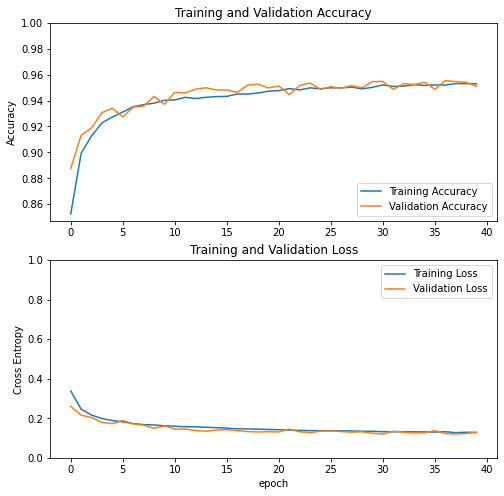

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 180s 122ms/step - loss: 0.3438 - accuracy: 0.8484 - val_loss: 0.2676 - val_accuracy: 0.8865
Epoch 2/40
1469/1469 [==============================] - 173s 118ms/step - loss: 0.2516 - accuracy: 0.8968 - val_loss: 0.2367 - val_accuracy: 0.9012
Epoch 3/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.2223 - accuracy: 0.9102 - val_loss: 0.1998 - val_accuracy: 0.9224
Epoch 4/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.2033 - accuracy: 0.9229 - val_loss: 0.1856 - val_accuracy: 0.9262
Epoch 5/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.1954 - accuracy: 0.9240 - val_loss: 0.1762 - val_accuracy: 0.9312
Epoch 6/40
1469/1469 [==============================] - 171s 116ms/step - loss: 0.1858 - accuracy: 0.9290 - val_loss: 0.1814 - val_accuracy: 0.9284
Epoch 7/40
1469/1469 [==============================] - 170s 116ms/step - loss: 0.18

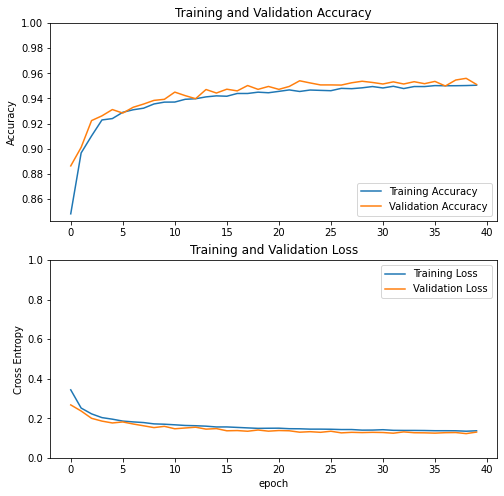

In [31]:
acc, val_acc, loss, val_loss = train_model(get_model_A_2(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_A_2(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_A_2(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.3610 - accuracy: 0.8270 - val_loss: 0.3224 - val_accuracy: 0.8705
Epoch 2/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.2941 - accuracy: 0.8664 - val_loss: 0.2514 - val_accuracy: 0.8862
Epoch 3/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.2507 - accuracy: 0.8918 - val_loss: 0.2397 - val_accuracy: 0.9077
Epoch 4/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.2252 - accuracy: 0.9060 - val_loss: 0.2068 - val_accuracy: 0.9064
Epoch 5/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.2097 - accuracy: 0.9139 - val_loss: 0.1810 - val_accuracy: 0.9286
Epoch 6/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.1973 - accuracy: 0.9197 - val_loss: 0.2000 - val_accuracy: 0.9272
Epoch 7/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.19

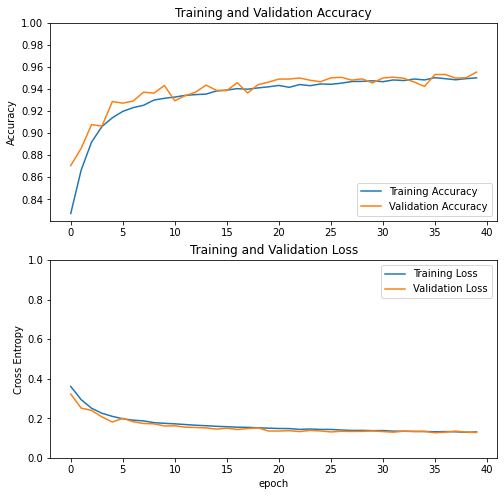

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 230s 156ms/step - loss: 0.3534 - accuracy: 0.8320 - val_loss: 0.2880 - val_accuracy: 0.8531
Epoch 2/40
1469/1469 [==============================] - 231s 158ms/step - loss: 0.2721 - accuracy: 0.8782 - val_loss: 0.2324 - val_accuracy: 0.8923
Epoch 3/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.2374 - accuracy: 0.8989 - val_loss: 0.2123 - val_accuracy: 0.9116
Epoch 4/40
1469/1469 [==============================] - 230s 156ms/step - loss: 0.2177 - accuracy: 0.9095 - val_loss: 0.2026 - val_accuracy: 0.9210
Epoch 5/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.2056 - accuracy: 0.9170 - val_loss: 0.1974 - val_accuracy: 0.9199
Epoch 6/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.1975 - accuracy: 0.9199 - val_loss: 0.1755 - val_accuracy: 0.9277
Epoch 7/40
1469/1469 [==============================] - 227s 155ms/step - loss: 0.18

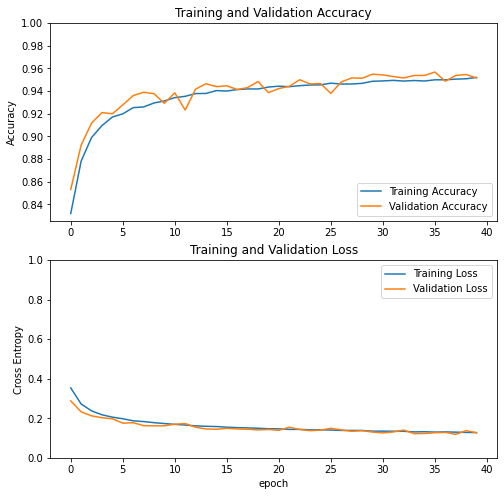

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 232s 157ms/step - loss: 0.3576 - accuracy: 0.8307 - val_loss: 0.3219 - val_accuracy: 0.8787
Epoch 2/40
1469/1469 [==============================] - 230s 156ms/step - loss: 0.2692 - accuracy: 0.8811 - val_loss: 0.2303 - val_accuracy: 0.8968
Epoch 3/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.2336 - accuracy: 0.9018 - val_loss: 0.2050 - val_accuracy: 0.9139
Epoch 4/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.2172 - accuracy: 0.9111 - val_loss: 0.1914 - val_accuracy: 0.9193
Epoch 5/40
1469/1469 [==============================] - 229s 155ms/step - loss: 0.2025 - accuracy: 0.9168 - val_loss: 0.1888 - val_accuracy: 0.9213
Epoch 6/40
1469/1469 [==============================] - 229s 156ms/step - loss: 0.1950 - accuracy: 0.9218 - val_loss: 0.2009 - val_accuracy: 0.9103
Epoch 7/40
1469/1469 [==============================] - 228s 155ms/step - loss: 0.18

KeyboardInterrupt: 

In [32]:
acc, val_acc, loss, val_loss = train_model(get_model_B(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_B(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_B(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 183s 124ms/step - loss: 0.3405 - accuracy: 0.8378 - val_loss: 0.2640 - val_accuracy: 0.8857
Epoch 2/40
1469/1469 [==============================] - 172s 117ms/step - loss: 0.2580 - accuracy: 0.8874 - val_loss: 0.2341 - val_accuracy: 0.9058
Epoch 3/40
1469/1469 [==============================] - 173s 118ms/step - loss: 0.2298 - accuracy: 0.9025 - val_loss: 0.2158 - val_accuracy: 0.9092
Epoch 4/40
1469/1469 [==============================] - 172s 117ms/step - loss: 0.2153 - accuracy: 0.9125 - val_loss: 0.1966 - val_accuracy: 0.9108
Epoch 5/40
1469/1469 [==============================] - 172s 117ms/step - loss: 0.2044 - accuracy: 0.9182 - val_loss: 0.1920 - val_accuracy: 0.9246
Epoch 6/40
1469/1469 [==============================] - 172s 117ms/step - loss: 0.1965 - accuracy: 0.9207 - val_loss: 0.1828 - val_accuracy: 0.9255
Epoch 7/40
1469/1469 [==============================] - 173s 118ms/step - loss: 0.19

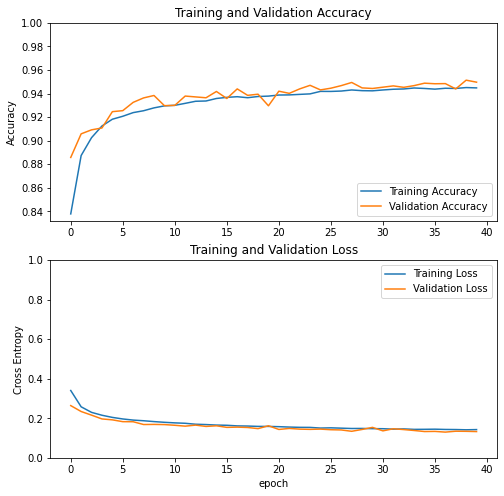

Training model, epochs:  40
Epoch 1/40
1469/1469 [==============================] - 185s 125ms/step - loss: 0.3425 - accuracy: 0.8387 - val_loss: 0.2661 - val_accuracy: 0.8873
Epoch 2/40
1469/1469 [==============================] - 176s 120ms/step - loss: 0.2579 - accuracy: 0.8874 - val_loss: 0.2149 - val_accuracy: 0.9044
Epoch 3/40
1469/1469 [==============================] - 176s 120ms/step - loss: 0.2277 - accuracy: 0.9062 - val_loss: 0.2005 - val_accuracy: 0.9103
Epoch 4/40
1469/1469 [==============================] - 176s 120ms/step - loss: 0.2121 - accuracy: 0.9137 - val_loss: 0.1844 - val_accuracy: 0.9245
Epoch 5/40
1469/1469 [==============================] - 176s 120ms/step - loss: 0.2029 - accuracy: 0.9179 - val_loss: 0.1872 - val_accuracy: 0.9260
Epoch 6/40
1469/1469 [==============================] - 176s 120ms/step - loss: 0.1951 - accuracy: 0.9233 - val_loss: 0.1774 - val_accuracy: 0.9314
Epoch 7/40
1469/1469 [==============================] - 175s 119ms/step - loss: 0.18

KeyboardInterrupt: 

In [33]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_A(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_C(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_C(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

acc, val_acc, loss, val_loss = train_model(get_model_C(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# Training from Scratch

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.0, False, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_B(0.0, False, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_C(0.0, False, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# Training with Data Augmentation

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_B(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_C(0.0, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# Training with Dropout

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, False, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_B(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.5, False, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_A(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_B(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_C(0.5, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

In [ ]:
acc, val_acc, loss, val_loss = train_model(get_model_C(0.2, True, 0.0), TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# L2 Reg

In [ ]:
for bias_r in [0.001, 0.01, 0.1]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.0, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.8, 0.5, 0.2]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.5, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.21, 0.23, 0.24]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.5, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.3, 0.35, 0.4]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.5, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.25, 0.27, 0.29]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.3, 0.35, 0.4]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.2, 0.4, 0.6]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.001, 0.01, 0.1]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_B(0.5, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.001, 0.01, 0.1]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_B(0.2, False, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.001, 0.01, 0.1]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.0, True, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.001, 0.01, 0.1]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_A(0.2, True, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

In [ ]:
for bias_r in [0.001, 0.01, 0.1]:
    print(bias_r)
    acc, val_acc, loss, val_loss = train_model(get_model_B(0.2, True, bias_r), TRAINING_EPOCHS)
    show_plot(acc, val_acc, loss, val_loss)

# Data Augmentation

This adds random transformations to the training images in order to reduce overfitting.

In [11]:
data_augmentation = tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

2022-05-28 11:53:36.389319: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-28 11:53:36.409045: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099885000 Hz


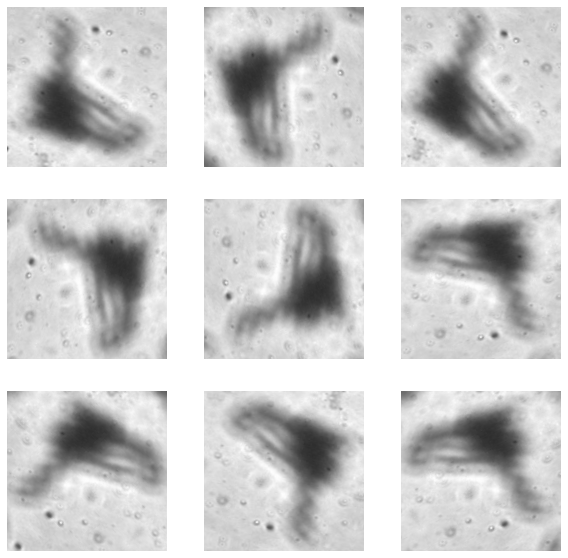

In [12]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
first_image = image[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# Training with Data Augmentation

# DenseNet model

In [124]:
dense_base_model = get_model_A()

preprocess_input = tf.keras.applications.densenet.preprocess_input
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
densenet_model = tf.keras.Model(inputs, x)

Training model, epochs:  40
Epoch 1/40
1094/1094 [==============================] - 27s 24ms/step - loss: 0.6160 - accuracy: 0.7696 - val_loss: 0.4633 - val_accuracy: 0.8152
Epoch 2/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.4529 - accuracy: 0.8126 - val_loss: 0.4314 - val_accuracy: 0.7957
Epoch 3/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.4030 - accuracy: 0.8265 - val_loss: 0.4537 - val_accuracy: 0.7810
Epoch 4/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.3861 - accuracy: 0.8307 - val_loss: 0.4877 - val_accuracy: 0.7654
Epoch 5/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.3591 - accuracy: 0.8407 - val_loss: 0.3506 - val_accuracy: 0.8384
Epoch 6/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.3428 - accuracy: 0.8477 - val_loss: 0.3464 - val_accuracy: 0.8389
Epoch 7/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.3286 - accuracy:

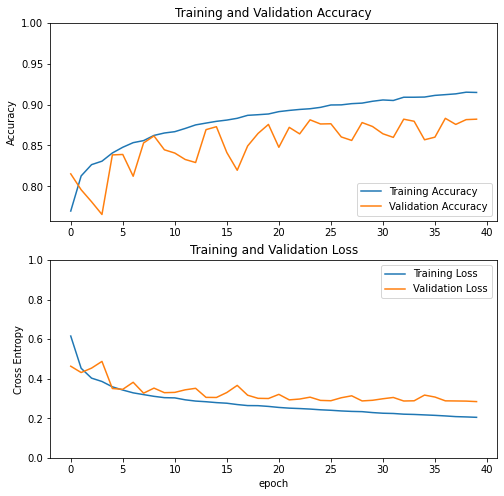

In [125]:
acc, val_acc, loss, val_loss = train_model(dense_base_model, TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# Training with Dropout

In [58]:
dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)

preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)

Training model, epochs:  40
Epoch 1/40
1094/1094 [==============================] - 27s 24ms/step - loss: 0.5142 - accuracy: 0.7992 - val_loss: 0.3241 - val_accuracy: 0.8577
Epoch 2/40
1094/1094 [==============================] - 26s 23ms/step - loss: 0.3524 - accuracy: 0.8461 - val_loss: 0.2997 - val_accuracy: 0.8585
Epoch 3/40
1094/1094 [==============================] - 26s 23ms/step - loss: 0.3224 - accuracy: 0.8589 - val_loss: 0.2825 - val_accuracy: 0.8779
Epoch 4/40
1094/1094 [==============================] - 27s 24ms/step - loss: 0.3090 - accuracy: 0.8637 - val_loss: 0.2728 - val_accuracy: 0.8804
Epoch 5/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.2974 - accuracy: 0.8675 - val_loss: 0.2724 - val_accuracy: 0.8690
Epoch 6/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.2915 - accuracy: 0.8709 - val_loss: 0.2636 - val_accuracy: 0.8785
Epoch 7/40
1094/1094 [==============================] - 26s 24ms/step - loss: 0.2825 - accuracy:

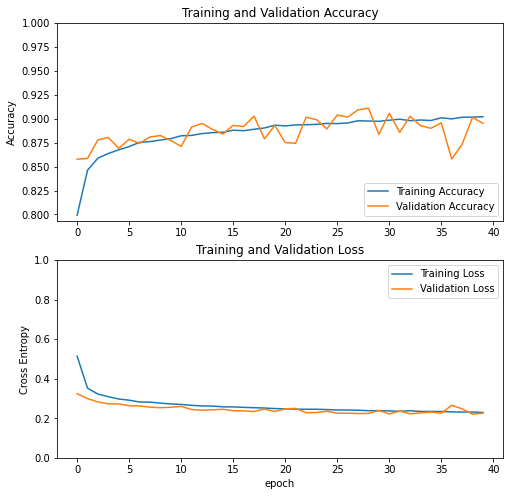

In [59]:
acc, val_acc, loss, val_loss = train_model(densenet_model, TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# 0.5 comparation

In [ ]:
dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)

preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)

In [ ]:
acc, val_acc, loss, val_loss = train_model(densenet_model, TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

# Training with Dropout + Data Augmentation

In [ ]:
dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)

preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)

In [ ]:
acc, val_acc, loss, val_loss = train_model(densenet_model, TRAINING_EPOCHS)
show_plot(acc, val_acc, loss, val_loss)

Regularizacao L2

In [ ]:
from tensorflow.keras import regularizers

l2_reg = 1

dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)

preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l1(l2_reg),
    bias_regularizer=regularizers.l1(l2_reg),
    activity_regularizer=regularizers.l1(l2_reg))

inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.25)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)

In [ ]:
#acc, val_acc, loss, val_loss = train_model(densenet_model, TRAINING_EPOCHS)
#show_plot(acc, val_acc, loss, val_loss)

In [ ]:
from tensorflow.keras import regularizers
l2_reg = 0.1

for bias_r in [0.001, 0.01, 0.1]:
    for activity_r in [0.001, 0.01, 0.1]:
        print("Trying L2 reg with Bias " + str(bias_r) + " activity_r: " + str(activity_r))
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
        preprocess_input = tf.keras.applications.densenet.preprocess_input
        global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
            bias_regularizer=regularizers.l2(bias_r),
            activity_regularizer=regularizers.l2(activity_r))
        
        inputs = tf.keras.Input(shape=(160, 160, 3))
        # x = data_augmentation(inputs)
        x = preprocess_input(inputs)
        x = dense_base_model(x)
        x = global_average_layer(x)
        # x = tf.keras.layers.Dropout(0.25)(x)
        outputs = prediction_layer(x)
        densenet_model = tf.keras.Model(inputs, outputs)
        
        acc, val_acc, loss, val_loss = train_model(densenet_model, TRAINING_EPOCHS)
        show_plot(acc, val_acc, loss, val_loss)

In [ ]:
from tensorflow.keras import regularizers
l2_reg = 0.1

for bias_r in [0.001, 0.01, 0.1, 1]:
    for activity_r in [0.1]:
        print("Trying L2 reg with Bias " + str(bias_r) + " activity_r: " + str(activity_r))
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
        preprocess_input = tf.keras.applications.densenet.preprocess_input
        global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(bias_r),
            bias_regularizer=regularizers.l2(bias_r),
            activity_regularizer=regularizers.l2(bias_r))
        
        inputs = tf.keras.Input(shape=(160, 160, 3))
        # x = data_augmentation(inputs)
        x = preprocess_input(inputs)
        x = dense_base_model(x)
        x = global_average_layer(x)
        # x = tf.keras.layers.Dropout(0.25)(x)
        outputs = prediction_layer(x)
        densenet_model = tf.keras.Model(inputs, outputs)
        
        acc, val_acc, loss, val_loss = train_model(densenet_model, TRAINING_EPOCHS)
        show_plot(acc, val_acc, loss, val_loss)

In [ ]:
from tensorflow.keras import regularizers
l2_reg = 0.1

for bias_r in [1]:
    for activity_r in [1]:
        print("Trying L2 reg with Bias " + str(bias_r) + " activity_r: " + str(activity_r))
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
        preprocess_input = tf.keras.applications.densenet.preprocess_input
        global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.1),
            bias_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.1))
        
        inputs = tf.keras.Input(shape=(160, 160, 3))
        # x = data_augmentation(inputs)
        x = preprocess_input(inputs)
        x = dense_base_model(x)
        x = global_average_layer(x)
        # x = tf.keras.layers.Dropout(0.25)(x)
        outputs = prediction_layer(x)
        densenet_model = tf.keras.Model(inputs, outputs)
        
        acc, val_acc, loss, val_loss = train_model(densenet_model, 80)
        show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40


2022-04-08 11:56:33.394797: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-04-08 11:56:33.902027: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302
2022-04-08 11:56:34.652241: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-04-08 11:56:34.653336: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


953/953 [==============================] - 344s 339ms/step - loss: 0.7404 - accuracy: 0.7607 - val_loss: 0.7228 - val_accuracy: 0.8040
Epoch 2/40
953/953 [==============================] - 318s 333ms/step - loss: 0.6917 - accuracy: 0.8212 - val_loss: 0.6769 - val_accuracy: 0.8292
Epoch 3/40
953/953 [==============================] - 317s 332ms/step - loss: 0.6580 - accuracy: 0.8455 - val_loss: 0.6510 - val_accuracy: 0.8376
Epoch 4/40
953/953 [==============================] - 318s 332ms/step - loss: 0.6282 - accuracy: 0.8669 - val_loss: 0.6285 - val_accuracy: 0.8409
Epoch 5/40
953/953 [==============================] - 317s 331ms/step - loss: 0.6016 - accuracy: 0.8858 - val_loss: 0.6253 - val_accuracy: 0.8986
Epoch 6/40
953/953 [==============================] - 317s 332ms/step - loss: 0.5767 - accuracy: 0.9045 - val_loss: 0.6254 - val_accuracy: 0.8991
Epoch 7/40
953/953 [==============================] - 321s 336ms/step - loss: 0.5549 - accuracy: 0.9212 - val_loss: 0.5861 - val_accura

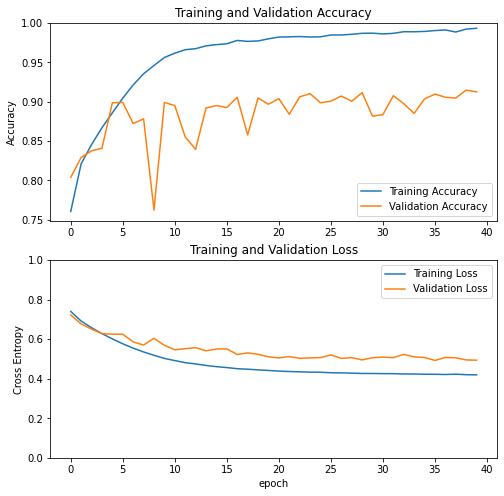

In [27]:
from tensorflow.keras import regularizers
l2_reg = 0.1

dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.1),
bias_regularizer=regularizers.l2(0.01),
activity_regularizer=regularizers.l2(0.1))
        
inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.25)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)
        
acc, val_acc, loss, val_loss = train_model(densenet_model, 40)
show_plot(acc, val_acc, loss, val_loss)

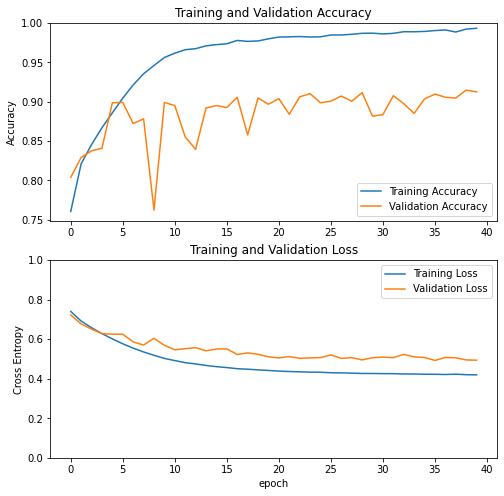

In [28]:
show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40
953/953 [==============================] - 353s 351ms/step - loss: 0.7360 - accuracy: 0.7690 - val_loss: 0.8700 - val_accuracy: 0.8236
Epoch 2/40
953/953 [==============================] - 329s 344ms/step - loss: 0.6868 - accuracy: 0.8251 - val_loss: 0.7553 - val_accuracy: 0.8556
Epoch 3/40
953/953 [==============================] - 328s 343ms/step - loss: 0.6523 - accuracy: 0.8517 - val_loss: 0.6680 - val_accuracy: 0.8788
Epoch 4/40
953/953 [==============================] - 333s 348ms/step - loss: 0.6240 - accuracy: 0.8728 - val_loss: 0.6741 - val_accuracy: 0.8929
Epoch 5/40
953/953 [==============================] - 335s 350ms/step - loss: 0.5975 - accuracy: 0.8914 - val_loss: 0.6117 - val_accuracy: 0.8929
Epoch 6/40
953/953 [==============================] - 333s 348ms/step - loss: 0.5735 - accuracy: 0.9103 - val_loss: 0.5947 - val_accuracy: 0.8687
Epoch 7/40
953/953 [==============================] - 323s 338ms/step - loss: 0.5510 - accuracy:

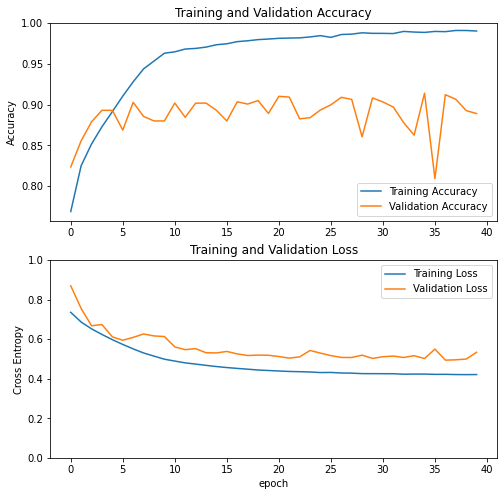

In [29]:
dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.1),
bias_regularizer=regularizers.l2(0.01),
activity_regularizer=regularizers.l2(0.1))
        
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.25)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)
        
acc, val_acc, loss, val_loss = train_model(densenet_model, 40)
show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40
953/953 [==============================] - 485s 423ms/step - loss: 0.7745 - accuracy: 0.7106 - val_loss: 0.7214 - val_accuracy: 0.7699
Epoch 2/40
953/953 [==============================] - 331s 346ms/step - loss: 0.7239 - accuracy: 0.7797 - val_loss: 0.6884 - val_accuracy: 0.8413
Epoch 3/40
953/953 [==============================] - 330s 345ms/step - loss: 0.6907 - accuracy: 0.8029 - val_loss: 0.6691 - val_accuracy: 0.8674
Epoch 4/40
953/953 [==============================] - 329s 344ms/step - loss: 0.6601 - accuracy: 0.8302 - val_loss: 0.6383 - val_accuracy: 0.8628
Epoch 5/40
953/953 [==============================] - 329s 344ms/step - loss: 0.6327 - accuracy: 0.8494 - val_loss: 0.6204 - val_accuracy: 0.8505
Epoch 6/40
953/953 [==============================] - 327s 342ms/step - loss: 0.6066 - accuracy: 0.8713 - val_loss: 0.6025 - val_accuracy: 0.8505
Epoch 7/40
953/953 [==============================] - 335s 350ms/step - loss: 0.5837 - accuracy:

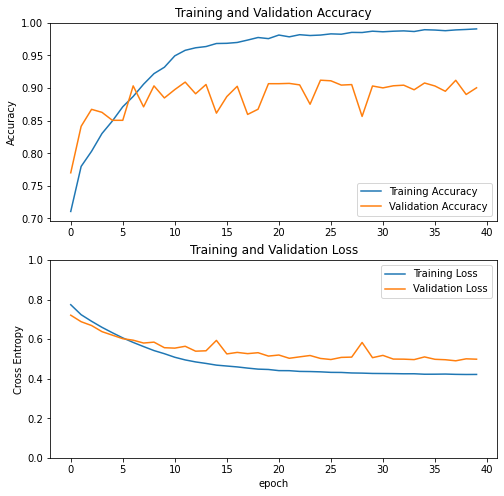

In [30]:
dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.1),
bias_regularizer=regularizers.l2(0.01),
activity_regularizer=regularizers.l2(0.1))
        
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)
        
acc, val_acc, loss, val_loss = train_model(densenet_model, 40)
show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40
953/953 [==============================] - 588s 429ms/step - loss: 0.7418 - accuracy: 0.7639 - val_loss: 0.7313 - val_accuracy: 0.8501
Epoch 2/40
953/953 [==============================] - 413s 430ms/step - loss: 0.6930 - accuracy: 0.8231 - val_loss: 0.6811 - val_accuracy: 0.8401
Epoch 3/40
953/953 [==============================] - 332s 347ms/step - loss: 0.6590 - accuracy: 0.8496 - val_loss: 0.6566 - val_accuracy: 0.8496
Epoch 4/40
953/953 [==============================] - 330s 345ms/step - loss: 0.6271 - accuracy: 0.8759 - val_loss: 0.6401 - val_accuracy: 0.8821
Epoch 5/40
953/953 [==============================] - 331s 346ms/step - loss: 0.6024 - accuracy: 0.8910 - val_loss: 0.6087 - val_accuracy: 0.8724
Epoch 6/40
953/953 [==============================] - 331s 346ms/step - loss: 0.5786 - accuracy: 0.9076 - val_loss: 0.6023 - val_accuracy: 0.8821
Epoch 7/40
953/953 [==============================] - 331s 346ms/step - loss: 0.5576 - accuracy:

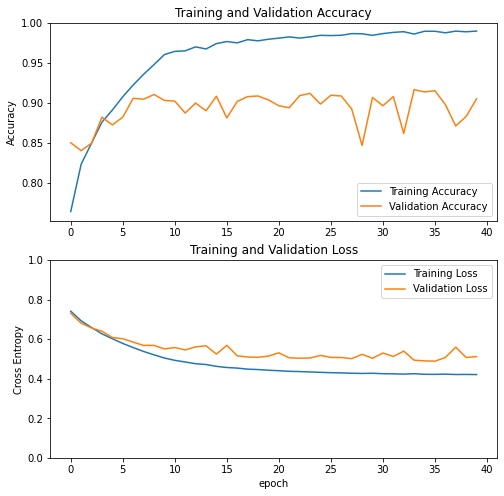

In [31]:
from tensorflow.keras import regularizers

dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.1),
bias_regularizer=regularizers.l2(0.01),
activity_regularizer=regularizers.l2(0.1))
        
inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)

x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.25)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)
        
acc, val_acc, loss, val_loss = train_model(densenet_model, 40)
show_plot(acc, val_acc, loss, val_loss)

Training model, epochs:  40
Epoch 1/40
953/953 [==============================] - 362s 361ms/step - loss: 0.7533 - accuracy: 0.6676 - val_loss: 0.7225 - val_accuracy: 0.8312
Epoch 2/40
953/953 [==============================] - 334s 349ms/step - loss: 0.6875 - accuracy: 0.7930 - val_loss: 0.6841 - val_accuracy: 0.8208
Epoch 3/40
953/953 [==============================] - 332s 347ms/step - loss: 0.6476 - accuracy: 0.8282 - val_loss: 0.6439 - val_accuracy: 0.8522
Epoch 4/40
953/953 [==============================] - 332s 348ms/step - loss: 0.6127 - accuracy: 0.8500 - val_loss: 0.6138 - val_accuracy: 0.8294
Epoch 5/40
953/953 [==============================] - 330s 344ms/step - loss: 0.5844 - accuracy: 0.8650 - val_loss: 0.5981 - val_accuracy: 0.8396
Epoch 6/40
953/953 [==============================] - 330s 346ms/step - loss: 0.5574 - accuracy: 0.8822 - val_loss: 0.5728 - val_accuracy: 0.8243
Epoch 7/40
953/953 [==============================] - 331s 346ms/step - loss: 0.5350 - accuracy:

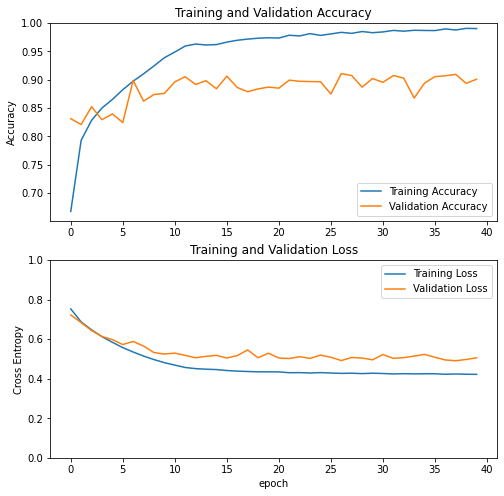

In [32]:
from tensorflow.keras import regularizers

dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
preprocess_input = tf.keras.applications.densenet.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.1),
bias_regularizer=regularizers.l2(0.01),
activity_regularizer=regularizers.l2(0.1))
batch_norm_layer = tf.keras.layers.BatchNormalization()
        
inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = dense_base_model(x)
x = batch_norm_layer(x)
x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.25)(x)
outputs = prediction_layer(x)
densenet_model = tf.keras.Model(inputs, outputs)
        
acc, val_acc, loss, val_loss = train_model(densenet_model, 40)
show_plot(acc, val_acc, loss, val_loss)

In [33]:
import numpy
from sklearn import metrics

def show_report(model, generator):
    test_steps_per_epoch = numpy.math.ceil(generator.samples / generator.batch_size)
    predictions = densenet_model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())   
    report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    print(report)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

train_generator = ImageDataGenerator()
train_data_generator = train_generator.flow_from_directory(train_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 6530 images belonging to 2 classes.
Found 30474 images belonging to 2 classes.


In [35]:
show_report(densenet_model, test_data_generator)
show_report(densenet_model, train_data_generator)

              precision    recall  f1-score   support

    Detritus       0.76      0.79      0.77      2122
       Other       0.90      0.88      0.89      4408

    accuracy                           0.85      6530
   macro avg       0.83      0.83      0.83      6530
weighted avg       0.85      0.85      0.85      6530

              precision    recall  f1-score   support

    Detritus       0.77      0.80      0.79      9682
       Other       0.90      0.89      0.90     20792

    accuracy                           0.86     30474
   macro avg       0.84      0.84      0.84     30474
weighted avg       0.86      0.86      0.86     30474



In [36]:
show_report(densenet_model, test_data_generator)
show_report(densenet_model, train_data_generator)

              precision    recall  f1-score   support

    Detritus       0.76      0.79      0.77      2122
       Other       0.90      0.88      0.89      4408

    accuracy                           0.85      6530
   macro avg       0.83      0.83      0.83      6530
weighted avg       0.85      0.85      0.85      6530

              precision    recall  f1-score   support

    Detritus       0.77      0.80      0.79      9682
       Other       0.90      0.89      0.90     20792

    accuracy                           0.86     30474
   macro avg       0.84      0.84      0.84     30474
weighted avg       0.86      0.86      0.86     30474



In [37]:
def show_confusion_matrix(model, generator):
    test_steps_per_epoch = numpy.math.ceil(generator.samples / generator.batch_size)
    predictions = densenet_model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    detr_list = ['LClass_Detritus', 'LClass_Bubbles', 'LClass_shadow']
    
    true_classes = generator.classes
    filepaths = generator.filepaths
    label_map = generator.class_indices
    index_map = {v: k for k, v in label_map.items()}
    
    class_labels = list(generator.class_indices.keys()) 
    correct =  {new_key: 0 for new_key in class_labels}
    incorrect = {new_key: 0 for new_key in class_labels}
    correct_files = []
    incorrect_files = []
    
    
    for i in range(len(true_classes)):
        if any(index_map[true_classes[i]] in s for s in detr_list):
            if (y_pred[i] == 0):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
        else:
            if (y_pred[i] == 1):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
    # report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    for class_name in class_labels:
        corr = correct[class_name]
        incorr = incorrect[class_name]
        total = corr + incorr
        if (total == 0):
            corr_perc = 0
        else:
            corr_perc = corr/total
        print(class_name, corr, incorr, total, corr_perc)
    return correct, incorrect, correct_files, incorrect_files

In [38]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(densenet_model, test_data_generator)

Detritus 1668 454 2122 0.7860508953817154
Other 3875 533 4408 0.8790834845735027


In [39]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
        final_dir = "Output/" + tenancy + "/" + class_name+"/" + result
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [40]:
# process_results(correct_files, incorrect_files, "test")

In [41]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(densenet_model, train_data_generator)

Detritus 7714 1968 9682 0.7967362115265441
Other 18543 2249 20792 0.8918333974605618


In [42]:
# process_results(correct_files, incorrect_files, "train")

In [43]:
val_generator = ImageDataGenerator()
val_data_generator = val_generator.flow_from_directory(val_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 6529 images belonging to 2 classes.


In [44]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(densenet_model, val_data_generator)

Detritus 1641 436 2077 0.7900818488204141
Other 3951 501 4452 0.887466307277628


In [45]:
#p rocess_results(correct_files, incorrect_files, "val")

In [ ]:
val_data_generator.classes